<a href="https://colab.research.google.com/github/havehill/BOAZ_20anal_mini_prj/blob/EDA/EDA_snghea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

💎 Brazilian E-Commerce Public Dataset by Olist EDA 수행 (노승혜)

#### 데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/분석미니플젝6조/Brazilian_Customer.csv')
print("결측치 확인")
print(data.isnull().sum())

결측치 확인
order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                        

In [3]:
# 결측치 제거
raw_data = data
data = data.drop(['review_comment_title', 'review_comment_message'], axis = 1)
data = data.dropna(axis = 0)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113216 entries, 0 to 117328
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113216 non-null  object 
 1   customer_id                    113216 non-null  object 
 2   order_status                   113216 non-null  object 
 3   order_purchase_timestamp       113216 non-null  object 
 4   order_approved_at              113216 non-null  object 
 5   order_delivered_carrier_date   113216 non-null  object 
 6   order_delivered_customer_date  113216 non-null  object 
 7   order_estimated_delivery_date  113216 non-null  object 
 8   review_id                      113216 non-null  object 
 9   review_score                   113216 non-null  int64  
 10  review_creation_date           113216 non-null  object 
 11  review_answer_timestamp        113216 non-null  object 
 12  payment_sequential            

In [4]:
data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP


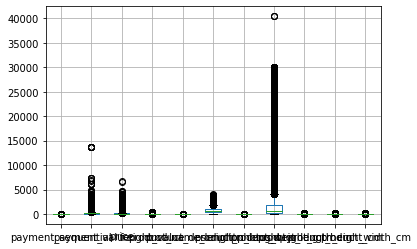

In [5]:
#이상치 확인 => 별점, 할부 수 같이 범위가 대략적으로 정해진 데이터 제외 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False  # matplotlib 마이너스기호 표시
plt.rc('font', family='NanumGothic')

data.boxplot(column = ['payment_sequential',
'payment_value',
'price',
'freight_value',
'product_name_lenght',
'product_description_lenght',
'product_photos_qty',
'product_weight_g',
'product_length_cm',
'product_height_cm',
'product_width_cm'])

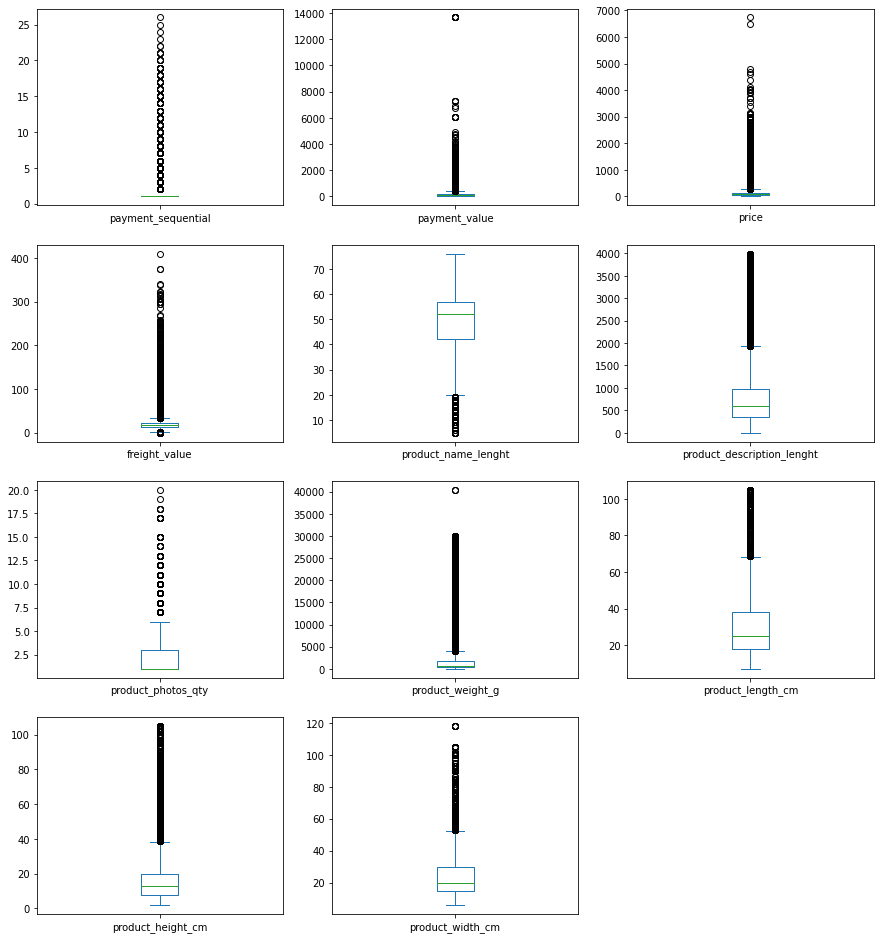

In [6]:
outlier = data[['payment_sequential',
'payment_value',
'price',
'freight_value',
'product_name_lenght',
'product_description_lenght',
'product_photos_qty',
'product_weight_g',
'product_length_cm',
'product_height_cm',
'product_width_cm']]

outlier.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 21))
plt.show()

payment_value, price, freight_value, product_weight_g, product_width_cm 변수에 대해서만 이상치 제거 수행

In [7]:
#이상치 제거
import numpy as np

def outliers_iqr(data, remove_col):
  #df = pd.Series(data)
  df = data
  for col in remove_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    #r = iqr * 1.5
    r = iqr * 3
    df = df[ (df[col] <= q3 + r) & (df[col] >= q1 - r) ]
    #df = df.reset_index(drop=True)
  
  return df

In [8]:
col_names = ['payment_value', 'price', 'freight_value', 'product_weight_g', 'product_width_cm']

del_outlier = outliers_iqr(data, col_names)

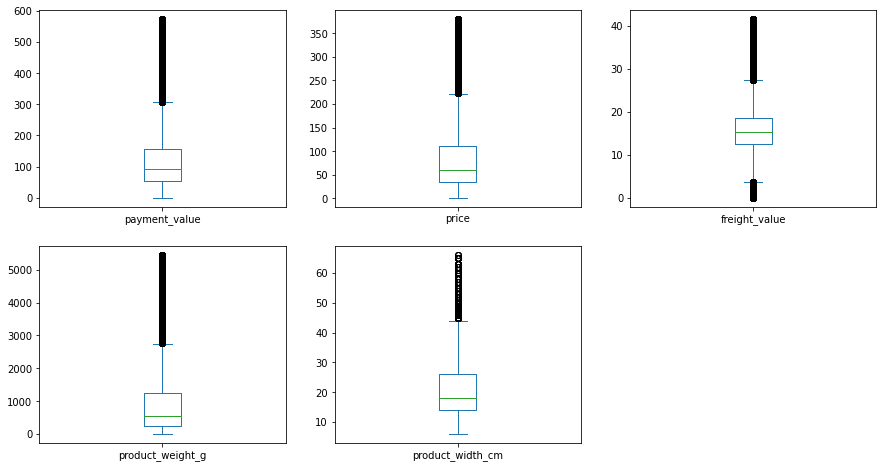

In [9]:
outlier = del_outlier[['payment_value', 'price', 'freight_value', 'product_weight_g', 'product_width_cm']]

outlier.plot(kind='box', subplots=True, layout=(5, 3), figsize=(15, 21))
plt.show()

In [10]:
del_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93722 entries, 0 to 117328
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       93722 non-null  object 
 1   customer_id                    93722 non-null  object 
 2   order_status                   93722 non-null  object 
 3   order_purchase_timestamp       93722 non-null  object 
 4   order_approved_at              93722 non-null  object 
 5   order_delivered_carrier_date   93722 non-null  object 
 6   order_delivered_customer_date  93722 non-null  object 
 7   order_estimated_delivery_date  93722 non-null  object 
 8   review_id                      93722 non-null  object 
 9   review_score                   93722 non-null  int64  
 10  review_creation_date           93722 non-null  object 
 11  review_answer_timestamp        93722 non-null  object 
 12  payment_sequential             93722 non-null

In [11]:
 # null, 이상치 제거한 df 내보내기

del_outlier.to_csv('/content/drive/MyDrive/BOAZ-Analysis/미니 프로젝트1/preprocessing.csv', index = False)

#### 간단한 시각화

https://www.kaggle.com/code/paulinan/e-commerce-eda 참고

In [12]:
# id, zip code 변수 제외
df_viz = del_outlier.drop(['order_id',
'customer_id',
'review_id',        
'customer_unique_id',      
'customer_zip_code_prefix',       
'order_item_id',                  
'product_id',                     
'seller_id',
'seller_zip_code_prefix'], axis = 1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


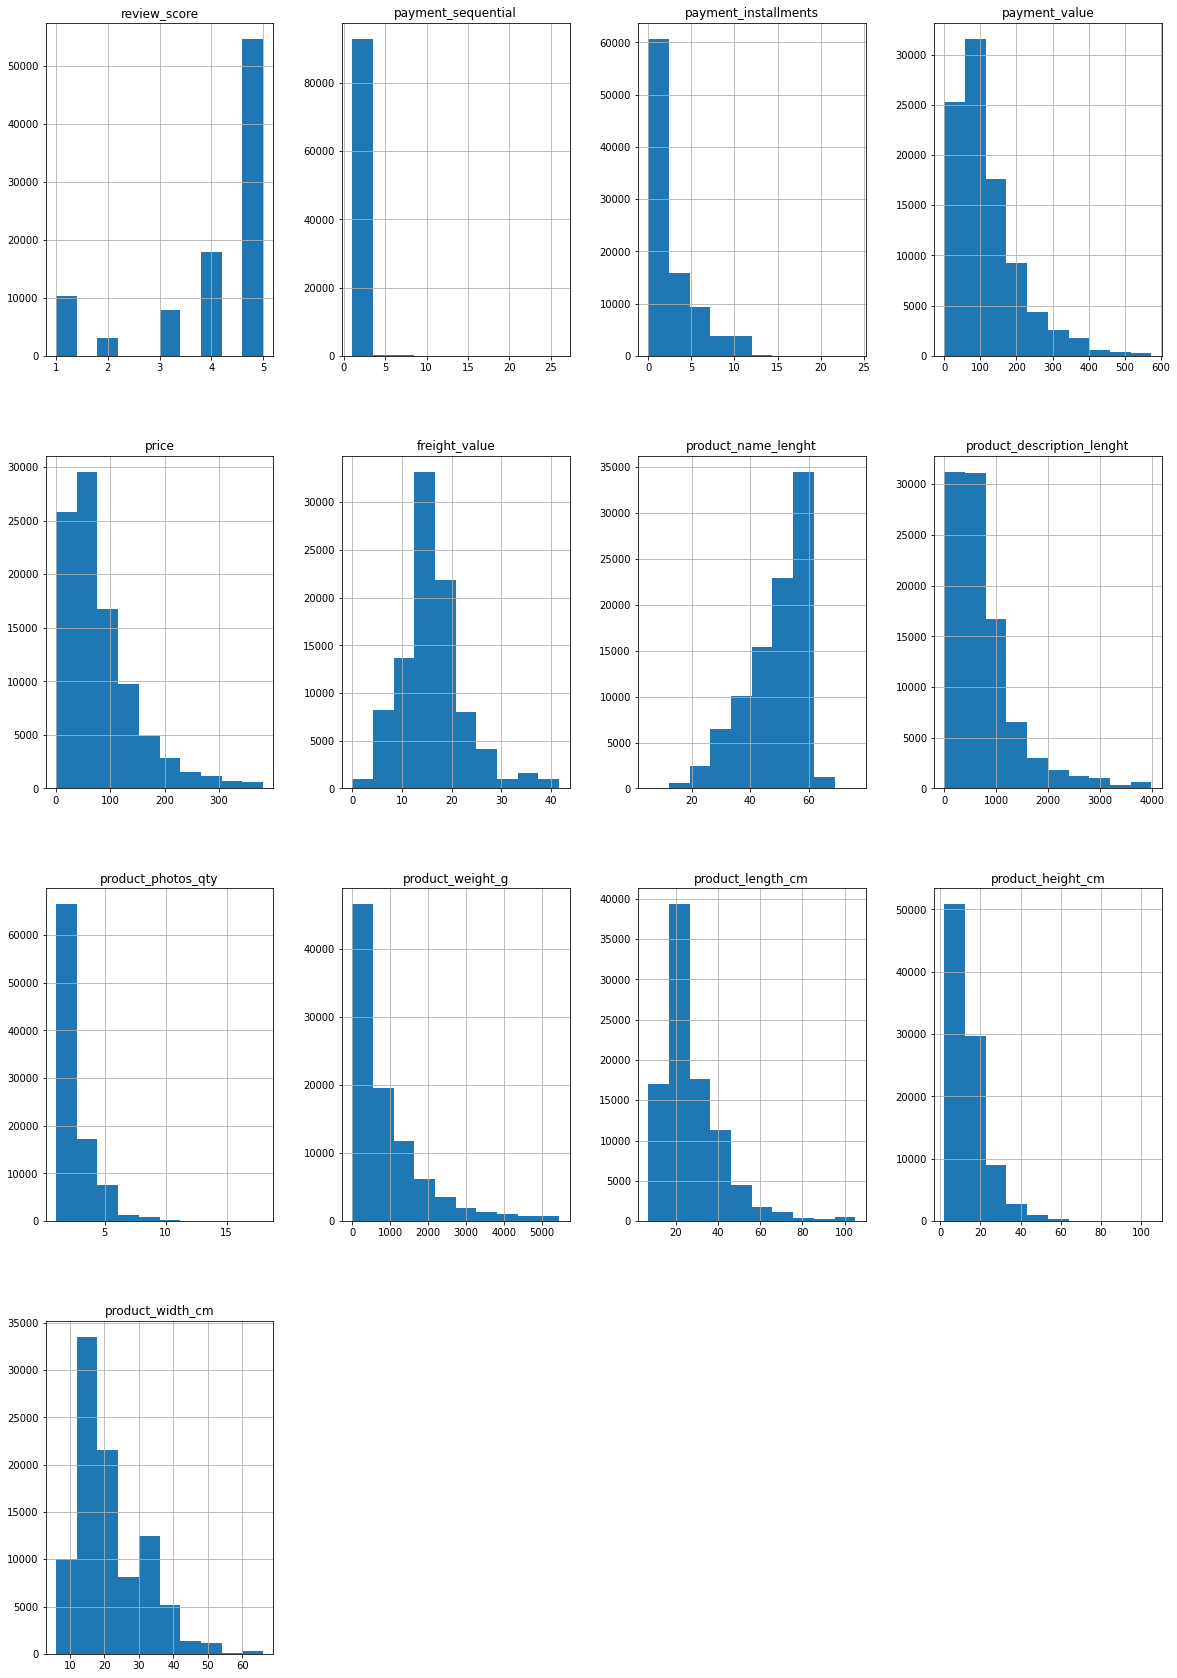

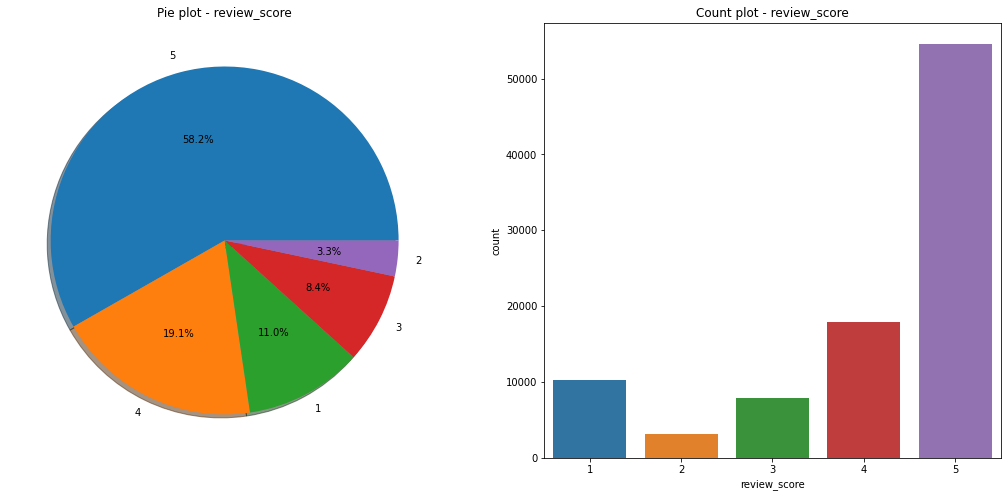

In [13]:
# review score를 중심으로 한 데이터 분포 확인

pd.DataFrame(df_viz).hist(figsize=(20,30))

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_viz["review_score"].value_counts().plot.pie(ax=ax[0], shadow=True, autopct='%1.1f%%')
ax[0].set_title('Pie plot - review_score')
ax[0].set_ylabel('')
sns.countplot('review_score', data=df_viz, ax=ax[1])
ax[1].set_title('Count plot - review_score')

plt.show()

Text(0.5, 1.0, 'Histogram of payments values (cut at 95th quantile)')

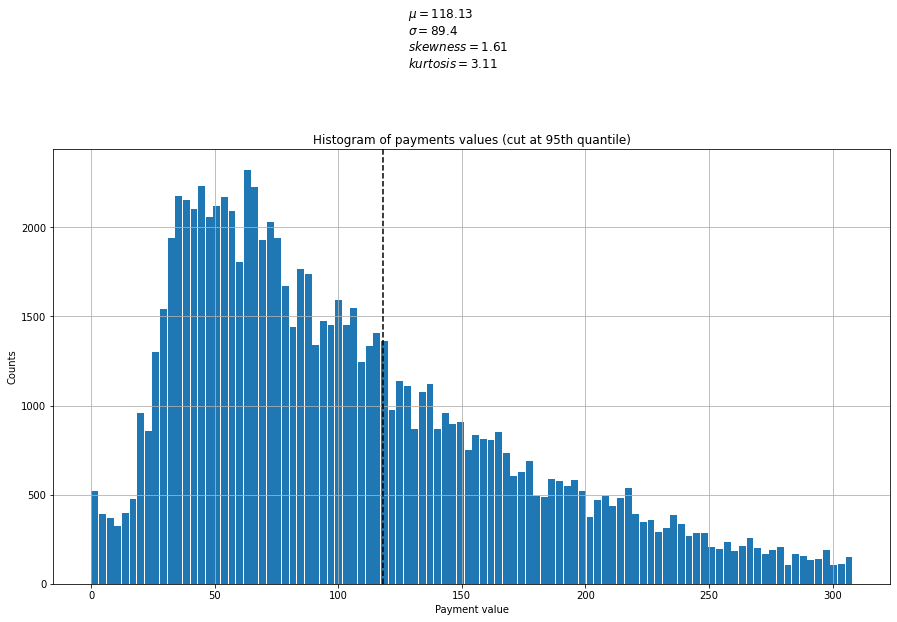

In [14]:
# payment_value 상세

mean = df_viz["payment_value"].mean()
std = df_viz["payment_value"].std()
skew = df_viz["payment_value"].skew()
kurt = df_viz["payment_value"].kurtosis()

text1 = '$\mu=$' + str(round(mean,2))
text2 = '$\sigma=$' +str(round(std,2))
text3 = '$skewness=$' + str(round(skew,2))
text4 = '$kurtosis=$' + str(round(kurt,2))
text = text1 + "\n" + text2 + "\n" + text3 + "\n" + text4

q95 = df_viz["payment_value"].quantile(.95)
payments_q95 = df_viz[df_viz["payment_value"]<q95]

payments_q95.hist(column = "payment_value", bins = 100, figsize=(15,8), rwidth=0.9)
plt.axvline(mean, color='k', linestyle='--')
plt.text(mean+10, 2900, text, fontsize=12)
plt.xlabel("Payment value")
plt.ylabel("Counts")
plt.title("Histogram of payments values (cut at 95th quantile)")

In [15]:
# 시간에 따른 구매 건수 확인

date = del_outlier[['order_id', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
df_date = date.copy()

In [16]:
df_date["order_purchase_timestamp"] = pd.to_datetime(date["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
df_date["order_delivered_carrier_date"] = pd.to_datetime(date["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
df_date["order_delivered_customer_date"] = pd.to_datetime(date["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
df_date["order_estimated_delivery_date"] = pd.to_datetime(date["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')

df_date.dtypes

order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

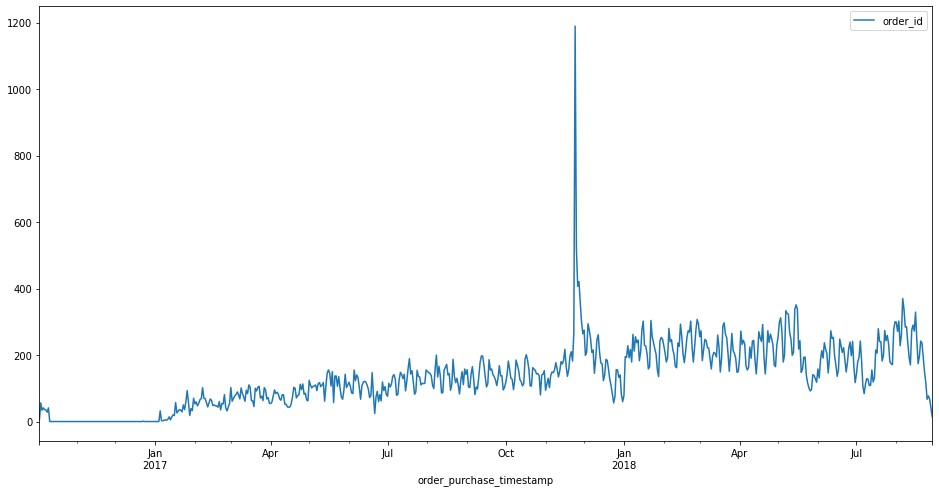

In [17]:
counts = df_date.set_index("order_purchase_timestamp").groupby(pd.Grouper(freq='D')).count()

fig = plt.figure(figsize=(16,8))
ax = fig.gca()
counts.plot(y = "order_id", use_index=True, ax=ax)

#연말에 order가 가장 많음

#### 변수 정리 및 파생 변수 생성

In [18]:
df_d = del_outlier.copy()

canceled 발생 건수 : 0


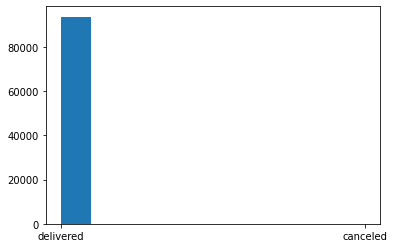

In [19]:
plt.hist(df_d['order_status'])

cnt = 0
for i in range(0, len(df_d['order_status'])):
  if ('canceled' in df_d['order_status']):
    cnt += 1

print('canceled 발생 건수 :',cnt)

In [20]:
# 변수 삭제
df_d = df_d.drop(['order_status'], axis = 1)

* 데이터 생성 년도
* 주문접수까지 걸리는 시간 : order_approved_at - order_purchase_timestamp

(array([42505.,     0.,     0.,     0.,     0., 50939.,     0.,     0.,
            0.,   278.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

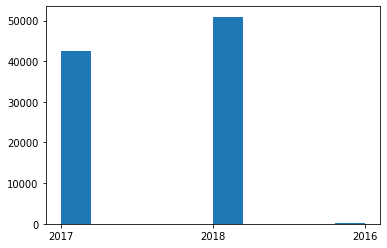

In [21]:
#1. 년도 변수

df_d['year'] = df_d.order_purchase_timestamp.str.split('-').str[0]

plt.hist(df_d['year'])

In [22]:
df_d = df_d.astype({'year':'int'})
df_d['year'].dtypes

dtype('int64')

In [23]:
#2. 주문 접수까지 걸리는 시간 변수

df_d["order_approved_at"] = pd.to_datetime(del_outlier["order_approved_at"], format='%Y-%m-%d %H:%M:%S')
df_d["order_purchase_timestamp"] = pd.to_datetime(del_outlier["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')

df_d['during_approved'] = df_d['order_approved_at'] - df_d['order_purchase_timestamp']
df_d['during_approved'].head(5)

0   0 days 00:10:42
1   0 days 00:10:42
2   0 days 00:10:42
3   0 days 01:35:45
4   0 days 00:18:28
Name: during_approved, dtype: timedelta64[ns]